## boilerplate imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy import misc
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Download data 

In [2]:
IMAGE_ROOT = "/home/mhuang/data/planes_satellite"
IMAGE_PATH = IMAGE_ROOT + "/images"

DATA_BUNDLE_FILENAME = "planesnet_bundle.zip"
DATA_IMAGES_FILENAME = "planesnet.zip"

In [3]:
!rm -rf $IMAGE_ROOT

In [4]:
!mkdir -p $IMAGE_ROOT

In [5]:
!curl "https://storage.googleapis.com/kaggle-datasets/1197/14776/planesnet.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1525360358&Signature=jybY3hauu%2BOnpVI6Ysu2qBnEzDrUi17xgj7T4B%2Br3i9dAeyrWs3R2mozc9C5gXNfMRDLwCpxsVgK4O13rvChH%2BLfGzVQUgkOGADDQG0fr0g8qsoesOsrg7XrKZByF2AaDKXB7gCEWf4oRwaEHKQcEqQvRV1ci34y9VV2ryd9xAHCmbbrXkxIdYyZhiQe%2FUZxqaa0CmS%2FvstA5LtN7tDVCWE8NWUJbMhd8e0i0Zk9in8CyqIlH2jSyxAJI7IvUaELZgagIRAdbfsRkL13fyiQEeiOXHb2Ap34oQshqiyYq%2BJ%2FH3A549OHJRdzlX10bljf6kwOYPwpJQZW73Q%2BO9126Q%3D%3D" > $IMAGE_ROOT/$DATA_BUNDLE_FILENAME

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 72.5M  100 72.5M    0     0  73.1M      0 --:--:-- --:--:-- --:--:-- 73.1M


In [6]:
!unzip -o $IMAGE_ROOT/$DATA_BUNDLE_FILENAME -d $IMAGE_ROOT

Archive:  /home/mhuang/data/planes_satellite/planesnet_bundle.zip
  inflating: /home/mhuang/data/planes_satellite/planesnet.json  
  inflating: /home/mhuang/data/planes_satellite/planesnet.zip  


In [7]:
!unzip -q -t $IMAGE_ROOT/$DATA_IMAGES_FILENAME

No errors detected in compressed data of /home/mhuang/data/planes_satellite/planesnet.zip.


In [8]:
!unzip -o -q -j $IMAGE_ROOT/$DATA_IMAGES_FILENAME -d $IMAGE_PATH

In [9]:
!ls -ltr $IMAGE_PATH | head

total 128000
-rw-rw-r-- 1 mhuang mhuang  906 Jan 21 19:37 1__20170729_175335_101d__-118.40592455007884_33.93955085537867.png
-rw-rw-r-- 1 mhuang mhuang  764 Jan 21 19:37 1__20170729_175107_1036__-118.41833221627427_33.940172226013956.png
-rw-rw-r-- 1 mhuang mhuang  804 Jan 21 19:37 1__20170728_180813_1039__-121.58701779603875_38.694769242571724.png
-rw-rw-r-- 1 mhuang mhuang  789 Jan 21 19:37 1__20170728_175003_102a__-118.4037708318591_33.941100279947925.png
-rw-rw-r-- 1 mhuang mhuang  863 Jan 21 19:37 1__20170728_175002_102a__-118.40332877746077_33.94671287238693.png
-rw-rw-r-- 1 mhuang mhuang  914 Jan 21 19:37 1__20170727_175114_0f3f__-118.40323269335445_33.946344345012726.png
-rw-rw-r-- 1 mhuang mhuang  929 Jan 21 19:37 1__20170727_175114_0f3f__-118.38581188623972_33.93494470621571.png
-rw-rw-r-- 1 mhuang mhuang  709 Jan 21 19:37 1__20170726_180807_1022__-122.38824470631792_37.61969954191162.png
-rw-rw-r-- 1 mhuang mhuang  841 Jan 21 19:37 1__20170726_174854_0f10__-117.8611940333088

## split images into train and validate using using sklearn

In [10]:
import shutil
import glob
import os.path as path
from sklearn.cross_validation import train_test_split



In [11]:
!rm -rf $IMAGE_PATH/train $IMAGE_PATH/valid $IMAGE_PATH/test

### split negative images first

In [12]:
# reserve some files for testing
TEST_RATIO = 0.05

In [13]:
!mkdir -p $IMAGE_PATH/train/0 $IMAGE_PATH/test/0

# load negave images which always start with "0_"

X_neg = y_neg = glob.glob(path.join(IMAGE_PATH, '0_*.png'))
X_neg_train, X_neg_test, y_neg_train, y_neg_test = train_test_split(X_neg, y_neg, test_size=TEST_RATIO, random_state=None)

# train

for x in X_neg_train:
    
    try:
        shutil.move(x, IMAGE_PATH + "/train/0")
    except OSError as err: 
        print("Error '{}' when moving file {} to target dir {}".format(err, x, target_dir))

# test

for x in X_neg_test:
    
    try:
        shutil.move(x, IMAGE_PATH + "/test/0")
    except OSError as err: 
        print("Error '{}' when moving file {} to target dir {}".format(err, x, target_dir))
        


### then split positive images 

In [14]:
!mkdir -p $IMAGE_PATH/train/1 $IMAGE_PATH/test/1

# load positive images which always start with "1_"

X_pos = y_pos = glob.glob(path.join(IMAGE_PATH, '1_*.png'))
X_pos_train, X_pos_test, y_pos_train, y_pos_test = train_test_split(X_pos, y_pos, test_size=TEST_RATIO, random_state=None)

# train

for x in X_pos_train:
    
    try:
        shutil.move(x, IMAGE_PATH + "/train/1")
    except OSError as err: 
        print("Error '{}' when moving file {} to target dir {}".format(err, x, target_dir))

# test

for x in X_pos_test:
    
    try:
        shutil.move(x, IMAGE_PATH + "/test/1")
    except OSError as err: 
        print("Error '{}' when moving file {} to target dir {}".format(err, x, target_dir))

## create CNN model

In [15]:
# imports

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout, InputLayer, BatchNormalization
from keras.optimizers import RMSprop, Adam
from keras.utils import np_utils
from keras import initializers
from keras import backend as K
from keras.callbacks import TensorBoard

Using TensorFlow backend.


### model params

In [16]:
pool_size = (2, 2)                    # size of poolin area for max pooling
prob_drop_conv = 0.25                  # drop probability for dropout @ conv layer
prob_drop_hidden = 0.5                # drop probability for dropout @ fc layer
image_shape=(20,20,3)

In [17]:
model = Sequential()

# input layer
model.add(InputLayer(input_shape=image_shape))

# batch normalization
model.add(BatchNormalization())

# conv1 layer
model.add(Conv2D(32, (3,3), padding='same', kernel_initializer='random_normal'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size, strides=(2, 2), padding='same'))
model.add(Dropout(prob_drop_conv))

# conv2 layer
model.add(Conv2D(64, (3,3), padding='same', kernel_initializer='random_normal'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size, strides=(2, 2), padding='same'))
model.add(Dropout(prob_drop_conv))

# conv3 layer
model.add(Conv2D(128, (3,3), padding='same', kernel_initializer='random_normal'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size, strides=(2, 2), padding='same'))
model.add(Flatten())
model.add(Dropout(prob_drop_conv))

# fc1 layer
# what "units" values work best here ??
model.add(Dense(units=250, kernel_initializer='random_normal'))
model.add(Activation('relu'))
model.add(Dropout(prob_drop_hidden))

# fc2 layer
model.add(Dense(units=2, kernel_initializer='random_normal'))
model.add(Activation('softmax'))
          
model.compile(optimizer=RMSprop(lr=0.001, rho=0.9), loss='binary_crossentropy', metrics=['binary_accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 20, 20, 3)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 20, 20, 3)         12        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 20, 20, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
__________

##  set up data generators using Keras Image Generator

### training parameters

In [18]:
BATCH_SIZE=32
VALIDATION_SPLIT=0.20
EPOCHS=50

### training and validation data generator

In [19]:
from keras.preprocessing import image

IMAGE_SIZE=(20,20)

train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    validation_split=VALIDATION_SPLIT,
    )

train_generator = train_datagen.flow_from_directory(
    IMAGE_PATH + "/train",
    target_size=IMAGE_SIZE,
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
    )

valid_generator = train_datagen.flow_from_directory(
    IMAGE_PATH + "/train",
    target_size=IMAGE_SIZE,
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
    )


Found 24320 images belonging to 2 classes.
Found 6080 images belonging to 2 classes.


### evaluation data generator

In [20]:
test_datagen = image.ImageDataGenerator(
    rescale=1./255,
    )

test_generator = test_datagen.flow_from_directory(
    IMAGE_PATH + "/test",
    target_size=IMAGE_SIZE,
    color_mode="rgb",
    batch_size=2*BATCH_SIZE,
    class_mode='categorical',
    )



Found 1600 images belonging to 2 classes.


## plot a few images

In [21]:
def plots(ims, figsize=(12,1), dpi=150, rows=1, interp=False, titles=None):
    f = plt.figure(figsize=figsize, dpi=dpi)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        if titles is not None:
            sp.set_title(titles[i], fontsize=8)
        plt.imshow(ims[i], interpolation=None if interp else 'none', cmap='gray')
        plt.axis('off')

0 (32, 20, 20, 3)
0 [[[[ 1.          0.96862751  0.98823535]
   [ 1.          0.96078438  0.98039222]
   [ 1.          0.97254908  0.98431379]
   ..., 
   [ 0.91764712  0.85490203  0.76862752]
   [ 0.84705889  0.79215693  0.6901961 ]
   [ 0.80392164  0.75686282  0.64705884]]

  [[ 1.          0.96862751  0.98823535]
   [ 1.          0.96862751  0.98431379]
   [ 1.          0.96470594  0.97647065]
   ..., 
   [ 0.8588236   0.80392164  0.72156864]
   [ 0.81176478  0.75294125  0.66666669]
   [ 0.86666673  0.80784321  0.71764708]]

  [[ 1.          0.96470594  0.98823535]
   [ 1.          0.96470594  0.98039222]
   [ 1.          0.96470594  0.97254908]
   ..., 
   [ 0.77647066  0.72156864  0.64705884]
   [ 0.63921571  0.60392159  0.50980395]
   [ 0.84313732  0.79215693  0.70588237]]

  ..., 
  [[ 1.          0.96470594  0.99215692]
   [ 1.          0.96470594  0.99215692]
   [ 1.          0.96862751  0.99215692]
   ..., 
   [ 1.          0.93725497  0.8588236 ]
   [ 0.90980399  0.85490203 

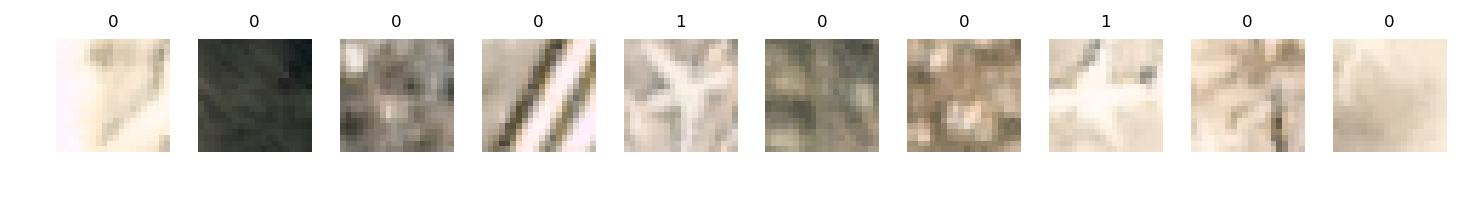

In [22]:
batches=0

for x_batch, y_batch in train_generator:
    print(batches, x_batch.shape)
    label_id = y_batch.argmax(axis=1)
    num_to_dump = 2
    print(batches, x_batch[:num_to_dump,:,:,:])
    print(batches, label_id[:num_to_dump])
    num_to_plot = min(10, x_batch.shape[0])
    plots(x_batch[:num_to_plot, :, :, :], titles=label_id[:num_to_plot])
    batches += 1
    if batches >= 1:
        break

## train model

### early stop callback

In [23]:
from keras.callbacks import EarlyStopping

PATIENCE = 10

early_stopping_calllback = EarlyStopping(monitor='val_loss', min_delta=0, patience=PATIENCE, verbose=1, mode='auto')

### tensorboard callback

In [24]:
from keras.callbacks import TensorBoard
import time

timestamp = time.strftime("%Y%m%d-%H%m%S")
log_dir = '/home/mhuang/tensorboard_logs/tutorial/planes_satellite/' + timestamp

tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=0, write_graph=True, write_grads=True, batch_size=2*BATCH_SIZE, write_images=True)

### model checkpoint callback

In [25]:
from keras.callbacks import ModelCheckpoint

checkpoint_root = '/home/mhuang/model_checkpoints/planes_satellite'
checkpoint_filename = 'weights.{epoch:02d}-{val_loss:.3f}.hdf5'
checkpoint_filepath = checkpoint_root + '/' + checkpoint_filename

!mkdir -p $checkpoint_root

model_checkpoint_callback = ModelCheckpoint(checkpoint_filepath, save_best_only=True, period=1, verbose=1)

In [26]:
history = model.fit_generator(train_generator, 
                             epochs=EPOCHS,
                             verbose=1,
                             shuffle=True,
                             validation_data=valid_generator,
                             callbacks=[early_stopping_calllback, tensorboard_callback, model_checkpoint_callback]
                             )

Epoch 1/50
760/760 [==============================] - 18s 23ms/step - loss: 0.2173 - binary_accuracy: 0.9119 - val_loss: 0.1825 - val_binary_accuracy: 0.9434

Epoch 00001: val_loss improved from inf to 0.18249, saving model to /home/mhuang/slow_disk/model_checkpoints/planes_satellite/weights.01-0.182.hdf5
Epoch 2/50
760/760 [==============================] - 18s 23ms/step - loss: 0.1310 - binary_accuracy: 0.9512 - val_loss: 0.1226 - val_binary_accuracy: 0.9613

Epoch 00002: val_loss improved from 0.18249 to 0.12256, saving model to /home/mhuang/slow_disk/model_checkpoints/planes_satellite/weights.02-0.123.hdf5
Epoch 3/50
760/760 [==============================] - 17s 23ms/step - loss: 0.1168 - binary_accuracy: 0.9568 - val_loss: 0.1471 - val_binary_accuracy: 0.9612

Epoch 00003: val_loss did not improve
Epoch 4/50
760/760 [==============================] - 17s 23ms/step - loss: 0.1014 - binary_accuracy: 0.9639 - val_loss: 0.1138 - val_binary_accuracy: 0.9661

Epoch 00004: val_loss impr

## evaluate

### current model and weights

In [27]:
evaluation = model.evaluate_generator(test_generator)
print('Summary: Loss over the test dataset: %.4f, Accuracy: %.4f' % (evaluation[0], evaluation[1]))

Summary: Loss over the test dataset: 0.0772, Accuracy: 0.9819


### evaluate using best saved model and weights

In [28]:
list_of_models = glob.glob(checkpoint_root + '/*.hdf5')
latest_model = max(list_of_models, key=path.getctime)
print(latest_model)

/home/mhuang/slow_disk/model_checkpoints/planes_satellite/weights.12-0.112.hdf5


In [29]:
from keras.models import load_model

best_model = load_model(latest_model)

In [30]:
evaluation = best_model.evaluate_generator(test_generator)
print('Summary: Loss over the test dataset: %.4f, Accuracy: %.4f' % (evaluation[0], evaluation[1]))

Summary: Loss over the test dataset: 0.0676, Accuracy: 0.9825
